# Generative classification on binclass.txt

### Part 1: Covariance matrices are different

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def MLE(x, pos_ex, neg_ex):
    mean_p = np.mean(x[pos_ex], axis=0) # Mean of positive examples μ+ ..vector
    mean_n = np.mean(x[neg_ex], axis=0) # Mean of negative examples μ- ..vector
    k = np.std(x[pos_ex], axis=0) #std of positive examples, σ+..vector
    covp = np.sum(k*k) # σ^2+=(σ1+^2 + σ2+^2) for positive examples. MLE estimate ..scalar
    k = np.std(x[neg_ex], axis=0) #std of positive examples, σ-
    covn = np.sum(k*k) # σ^2-=(σ1-^2 + σ2-^2) for negative examples. MLE estimate ..scalar
    return np.array([mean_p, mean_n]), np.array([[covp], [covn]])

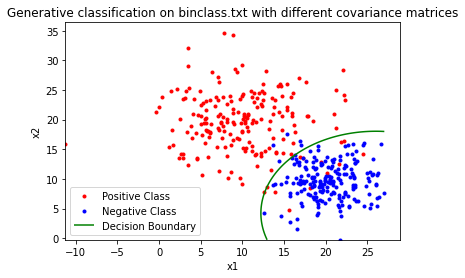

In [3]:
# PLots only the data points
def plotData(x, y, pos_ex, neg_ex):
    plt.scatter(x[pos_ex,0], x[pos_ex,1], color='red',label='Positive Class', marker='.')
    plt.scatter(x[neg_ex,0], x[neg_ex,1], color='blue',label='Negative Class', marker='.')
    
# plots the decision boundary
# y, x contains min to max ranges for respective axis
def plotBoundary(mean, cov, classi, classj, y, x):
    covi = cov[classi].reshape(())
    covj = cov[classj].reshape(())
    #Extracts σ^2+ in covi and σ^2- in covj

    mui = mean[classi].reshape((mean[classi].shape[0], 1))
    muj = mean[classj].reshape((mean[classj].shape[0], 1))
    #mui contains μ+ and muj contains μ-
    
    X, Y = np.meshgrid(x, y)
    Z1 = (((2*3.14)**mui.shape[0])*covi)**(-1/2)*np.exp(((X-mui[0])**2 + (Y-mui[1])**2)/(-1*covi))
    Z2 = (((2*3.14)**muj.shape[0])*covj)**(-1/2)*np.exp(((X-muj[0])**2 + (Y-muj[1])**2)/(-1*covj))

    Z = Z1 - Z2
    plot=plt.contour(X, Y, Z,levels = [0], alpha = 1.0, cmap = ListedColormap('green'))
    plot.collections[0].set_label('Decision Boundary')
    plt.title('Generative classification on binclass.txt with different covariance matrices')
    plt.legend()
    plt.show()
    
data = np.genfromtxt('binclass.txt',delimiter=',')
x = data[:,:data.shape[1]-1] #inputs
y = data[:,data.shape[1]-1] #outputs
pos_ex = y>0 # has true values for positive values of y
neg_ex = y<0 # has true values for negative values of y
x2 = np.arange(np.min(x[:,1]),np.max(x[:,1]),0.01) # np.min(x[:,1]) is smallest value in feature x2   
x1 = np.arange(np.min(x[:,0]),np.max(x[:,0]),0.01) # np.min(x[:,0]) is smallest value in feature x1
#x1 and x2 contain min to max ranges for respective axis, will be used for meshgrid
    
mean, cov = MLE(x, pos_ex, neg_ex)
plt.xlabel('x1')
plt.ylabel('x2')
plotData(x, y, pos_ex, neg_ex)
plotBoundary(mean, cov, 0, 1, x2, x1)


### Part 2: Covariance matrices are same

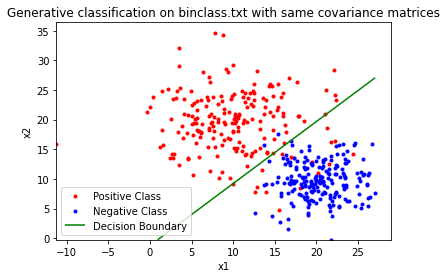

In [4]:
# plots the decision boundary
def plotBoundary(mu, cov, classi, classj, y, x):
    cov= cov[classi].reshape(())+cov[classj].reshape(())
    #σ^2 = σ^2+ + σ^2-
    mui = mu[classi].reshape((mu[classi].shape[0], 1))
    muj = mu[classj].reshape((mu[classj].shape[0], 1))
    #mui contains μ+ and muj contains μ-

    X, Y = np.meshgrid(x, y)
    Z1 = (((2*3.14)**mui.shape[0])*cov)**(-1/2)*np.exp(((X-mui[0])**2 + (Y-mui[1])**2)/(-1*cov))
    Z2 = (((2*3.14)**muj.shape[0])*cov)**(-1/2)*np.exp(((X-muj[0])**2 + (Y-muj[1])**2)/(-1*cov))
    Z = Z1 - Z2
    plt.title('Generative classification on binclass.txt with same covariance matrices')
    plot=plt.contour(X, Y, Z, levels = [0], alpha = 1.0, cmap = ListedColormap('green'))
    plot.collections[0].set_label('Decision Boundary')
    plt.legend()
    plt.show()

data = np.genfromtxt('binclass.txt',delimiter=',')
x = data[:,:data.shape[1]-1] #inputs
y = data[:,data.shape[1]-1] #outputs
pos_ex = y>0 # has true values for positive values of y
neg_ex = y<0 # has true values for negative values of y
x2 = np.arange(np.min(x[:,1]),np.max(x[:,1]),0.01) # np.min(x[:,1]) is smallest value in feature x2   
x1 = np.arange(np.min(x[:,0]),np.max(x[:,0]),0.01) # np.min(x[:,0]) is smallest value in feature x1
#x1 and x2 contain min to max ranges for respective axis, will be used for meshgrid
    
mean, cov = MLE(x, pos_ex, neg_ex)
plt.xlabel('x1')
plt.ylabel('x2')
plotData(x, y, pos_ex, neg_ex)
plotBoundary(mean, cov, 0, 1, x2, x1)


# Generative classification on binclassv2.txt

### Part 1: Covariance matrices are different

In [5]:
def MLE(x, pos_ex, neg_ex):
    mean_p = np.mean(x[pos_ex], axis=0) # Mean of positive examples μ+ ..vector
    mean_n = np.mean(x[neg_ex], axis=0) # Mean of negative examples μ- ..vector
    k = np.std(x[pos_ex], axis=0) #std of positive examples, σ+..vector
    covp = np.sum(k*k) # σ^2+=(σ1+^2 + σ2+^2) for positive examples. MLE estimate ..scalar
    k = np.std(x[neg_ex], axis=0) #std of positive examples, σ-
    covn = np.sum(k*k) # σ^2-=(σ1-^2 + σ2-^2) for negative examples. MLE estimate ..scalar
    return np.array([mean_p, mean_n]), np.array([[covp], [covn]])

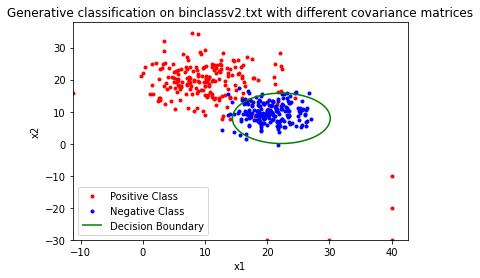

In [6]:
# PLots only the data points
def plotData(x, y, pos_ex, neg_ex):
    plt.scatter(x[pos_ex,0], x[pos_ex,1], color='red',label='Positive Class', marker='.')
    plt.scatter(x[neg_ex,0], x[neg_ex,1], color='blue',label='Negative Class', marker='.')

# plots the decision boundary
# y, x contains min to max ranges for respective axis
def plotBoundary(mean, cov, classi, classj, y, x):
    covi = cov[classi].reshape(())
    covj = cov[classj].reshape(())
    #Extracts σ^2+ in covi and σ^2- in covj

    mui = mean[classi].reshape((mean[classi].shape[0], 1))
    muj = mean[classj].reshape((mean[classj].shape[0], 1))
    #mui contains μ+ and muj contains μ-
    
    X, Y = np.meshgrid(x, y)
    Z1 = (((2*3.14)**mui.shape[0])*covi)**(-1/2)*np.exp(((X-mui[0])**2 + (Y-mui[1])**2)/(-1*covi))
    Z2 = (((2*3.14)**muj.shape[0])*covj)**(-1/2)*np.exp(((X-muj[0])**2 + (Y-muj[1])**2)/(-1*covj))

    Z = Z1 - Z2
    plot=plt.contour(X, Y, Z,levels = [0], alpha = 1.0, cmap = ListedColormap('green'))
    plot.collections[0].set_label('Decision Boundary')
    plt.title('Generative classification on binclassv2.txt with different covariance matrices')
    plt.legend()
    plt.show()

data = np.genfromtxt('binclassv2.txt',delimiter=',')
x = data[:,:data.shape[1]-1] #inputs
y = data[:,data.shape[1]-1] #outputs
pos_ex = y>0 # has true values for positive values of y
neg_ex = y<0 # has true values for negative values of y
x2 = np.arange(np.min(x[:,1]),np.max(x[:,1]),0.01) # np.min(x[:,1]) is smallest value in feature x2   
x1 = np.arange(np.min(x[:,0]),np.max(x[:,0]),0.01) # np.min(x[:,0]) is smallest value in feature x1
#x1 and x2 contain min to max ranges for respective axis, will be used for meshgrid
    
mean, cov = MLE(x, pos_ex, neg_ex)
plt.xlabel('x1')
plt.ylabel('x2')
plotData(x, y, pos_ex, neg_ex)
plotBoundary(mean, cov, 0, 1, x2, x1)


### Part 2: Covariance matrices are same

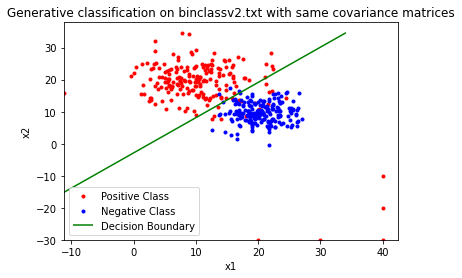

In [7]:
# plots the decision boundary
def plotBoundary(mu, cov, classi, classj, y, x):
    cov= cov[classi].reshape(())+cov[classj].reshape(())
    #σ^2 = σ^2+ + σ^2-
    mui = mu[classi].reshape((mu[classi].shape[0], 1))
    muj = mu[classj].reshape((mu[classj].shape[0], 1))
    #mui contains μ+ and muj contains μ-

    X, Y = np.meshgrid(x, y)
    Z1 = (((2*3.14)**mui.shape[0])*cov)**(-1/2)*np.exp(((X-mui[0])**2 + (Y-mui[1])**2)/(-1*cov))
    Z2 = (((2*3.14)**muj.shape[0])*cov)**(-1/2)*np.exp(((X-muj[0])**2 + (Y-muj[1])**2)/(-1*cov))
    Z = Z1 - Z2
    plt.title('Generative classification on binclassv2.txt with same covariance matrices')
    plot=plt.contour(X, Y, Z, levels = [0], alpha = 1.0, cmap = ListedColormap('green'))
    plot.collections[0].set_label('Decision Boundary')
    plt.legend()
    plt.show()

data = np.genfromtxt('binclassv2.txt',delimiter=',')
x = data[:,:data.shape[1]-1] #inputs
y = data[:,data.shape[1]-1] #outputs
pos_ex = y>0 # has true values for positive values of y
neg_ex = y<0 # has true values for negative values of y
x2 = np.arange(np.min(x[:,1]),np.max(x[:,1]),0.01) # np.min(x[:,1]) is smallest value in feature x2   
x1 = np.arange(np.min(x[:,0]),np.max(x[:,0]),0.01) # np.min(x[:,0]) is smallest value in feature x1
#x1 and x2 contain min to max ranges for respective axis, will be used for meshgrid
    
mean, cov = MLE(x, pos_ex, neg_ex)
plt.xlabel('x1')
plt.ylabel('x2')
plotData(x, y, pos_ex, neg_ex)
plotBoundary(mean, cov, 0, 1, x2, x1)